In [ ]:
import matplotlib.pyplot as plt
import numpy as np

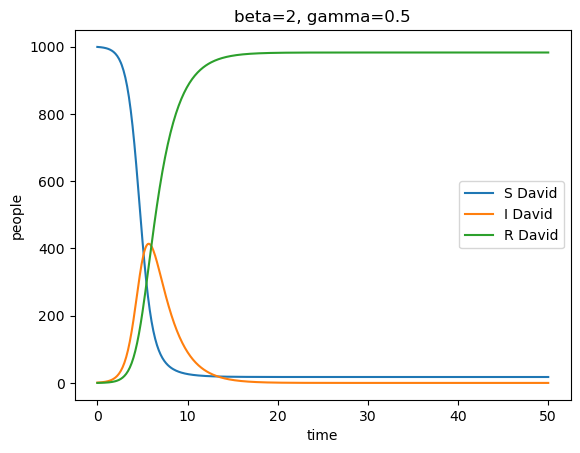

In [37]:
# Problem 1

#initial values
dt=0.1
N=1000
t=np.linspace(0,50,500)
beta=2
gamma=0.5
I0=1
S0=999
I=np.zeros(500)
S=np.zeros(500)
R=np.zeros(500)

#sir equations
def Sdot(S,I):
    return (-beta*S*I/N)
def Idot(S,I):
    return (beta*S*I/N) - (gamma*I)
def Rdot(I):
    return (gamma*I)


I[0]=I0
S[0]=S0
R[0]=0

#forward euler
for i in range(499):  
    S[i + 1] = S[i] + Sdot(S[i], I[i]) * dt
    I[i + 1] = I[i] + Idot(S[i], I[i]) * dt
    R[i + 1] = R[i] + Rdot(I[i]) * dt

#plotting
plt.plot(t,S,label='S David')
plt.plot(t,I,label='I David')
plt.plot(t,R,label='R David')
plt.legend()
plt.xlabel('time')
plt.ylabel('people')
plt.title('beta=2, gamma=0.5')
plt.show()
